# SVR

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

## PH0100
## p vs fr

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9820530861191482
RMSE:  0.4943907964382031


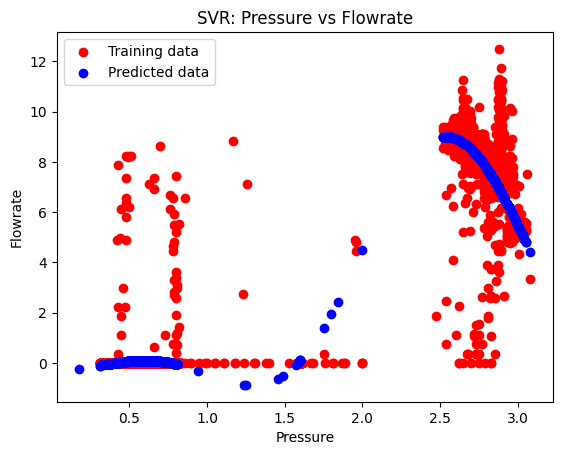

In [32]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

### smoothened

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9135509111745955
RMSE:  1.085064857496426


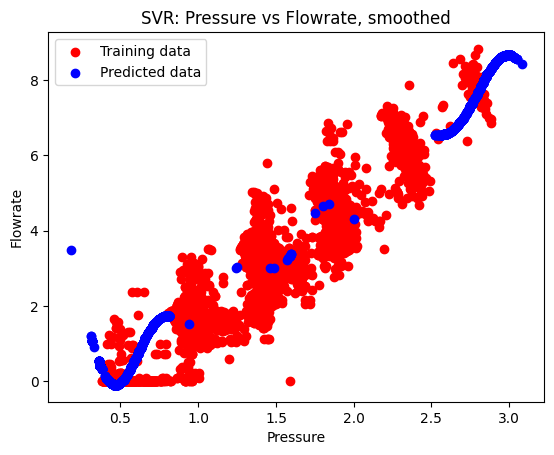

In [33]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure vs Flowrate, smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

### sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9752896941151207
RMSE:  0.5779573580202145


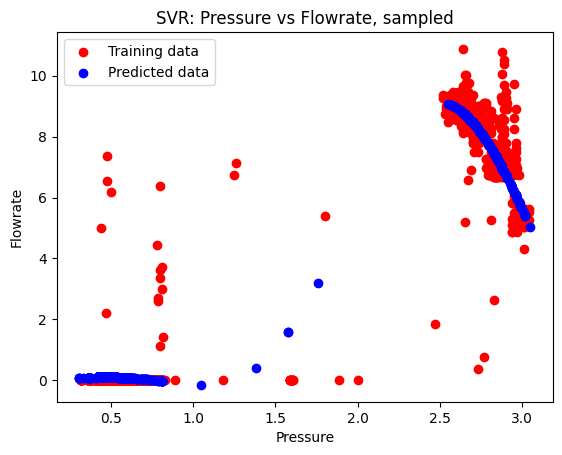

In [34]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure vs Flowrate, sampled')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

### smoothed and sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9534097400281495
RMSE:  0.7936048317481571


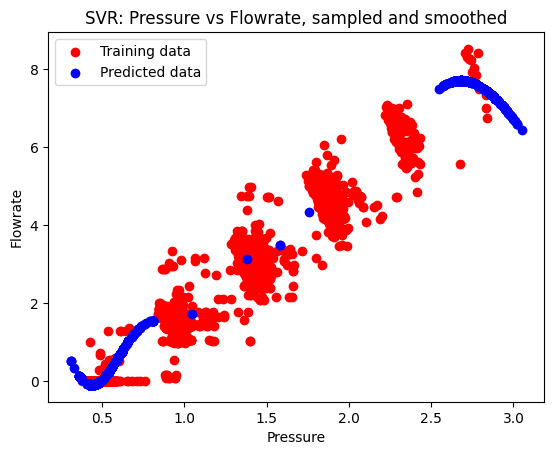

In [35]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure vs Flowrate, sampled and smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

## pv vs fr

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9602930942099236
RMSE:  0.7353744060976133


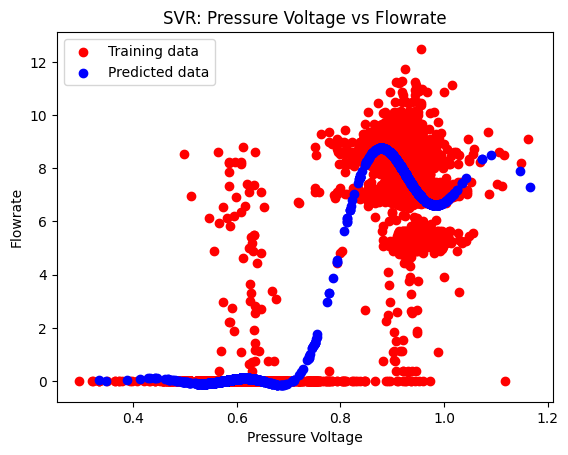

In [36]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### smoothed

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9016686282747677
RMSE:  1.1572349374980215


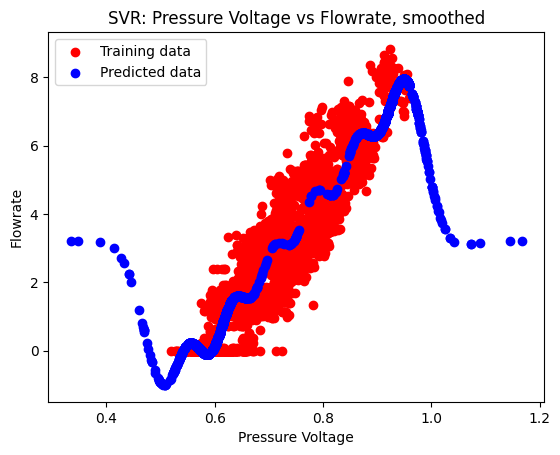

In [37]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
#selecting every 5th row
# df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

### sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9534023067096201
RMSE:  0.7936681377076762


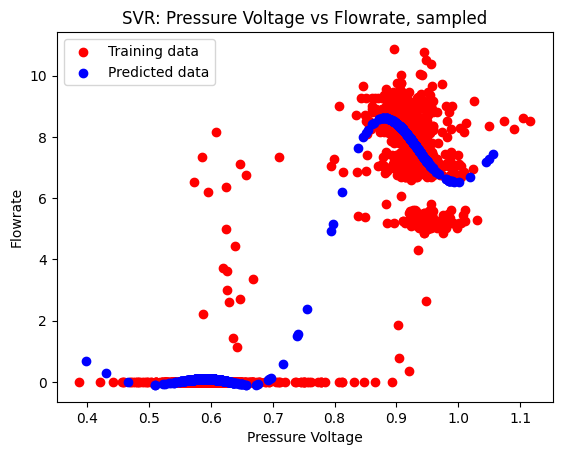

In [38]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, sampled')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

### smoothed and sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9087162435068811
RMSE:  1.110845060650898


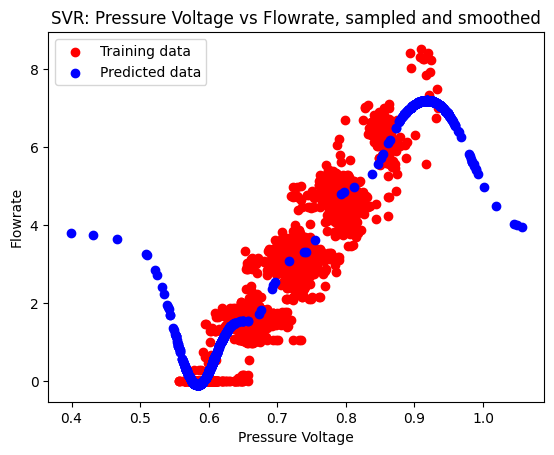

In [5]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, sampled and smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

### pv vs p

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9856747245035185
RMSE:  0.1303148851344679


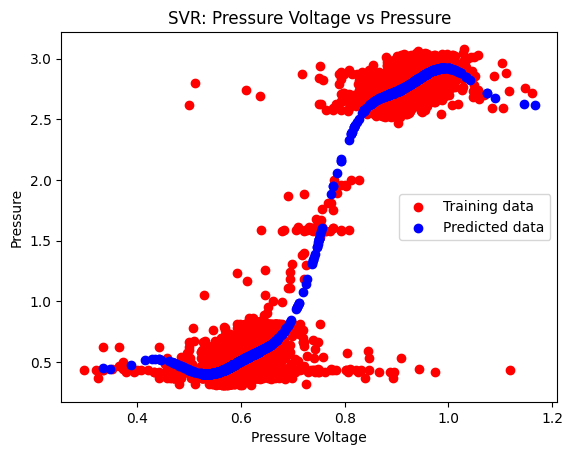

In [40]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
# df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Pressure')
# title
plt.title('SVR: Pressure Voltage vs Pressure')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### smoothed

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9704577542681914
RMSE:  0.1871389925988096


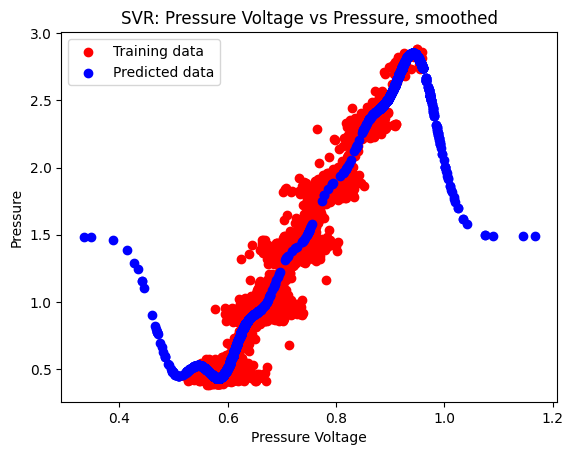

In [41]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
# df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Pressure')
# title
plt.title('SVR: Pressure Voltage vs Pressure, smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9881620640684385
RMSE:  0.11821694139256154


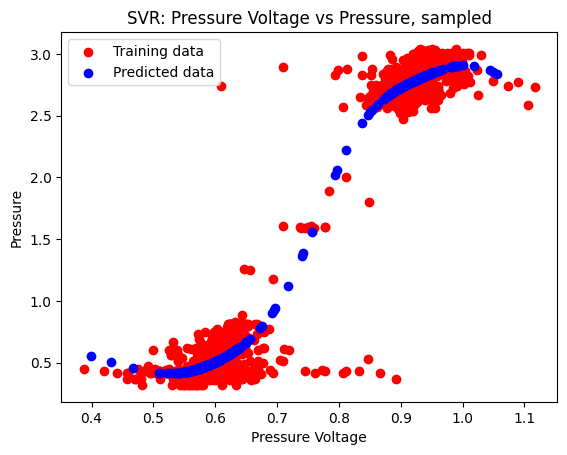

In [42]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Pressure')
# title
plt.title('SVR: Pressure Voltage vs Pressure, sampled')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### smoothed and sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9682906633787846
RMSE:  0.19347965501417402


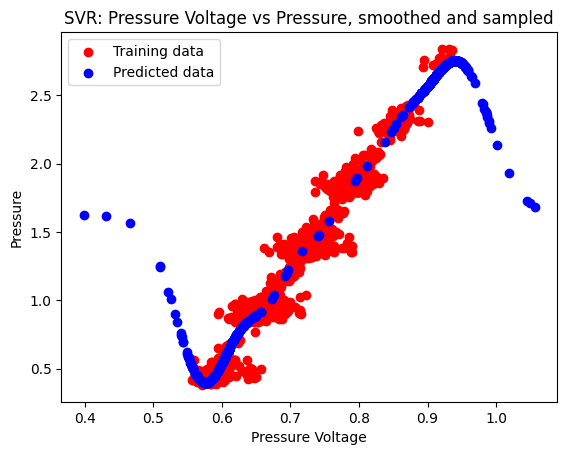

In [54]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Pressure')
# title
plt.title('SVR: Pressure Voltage vs Pressure, smoothed and sampled')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


## PH0302

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9516945021898651
RMSE:  0.44873381091472697


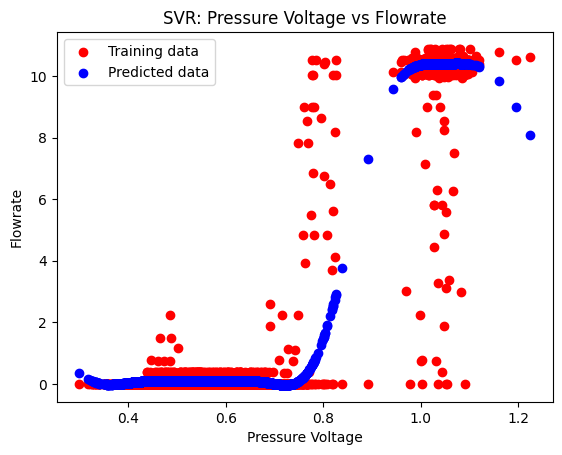

In [44]:
# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### smoothed

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.21166550785555105
RMSE:  1.812782821602313


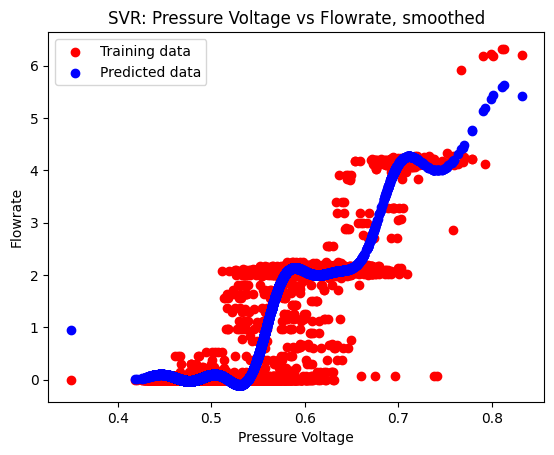

In [55]:
# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.982953838826413
RMSE:  0.2894802218596973


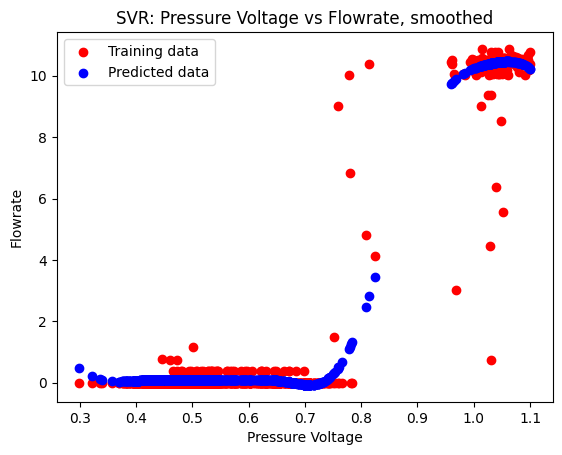

In [46]:
# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### smoothed and sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.20940964467021583
RMSE:  1.9714299839288578


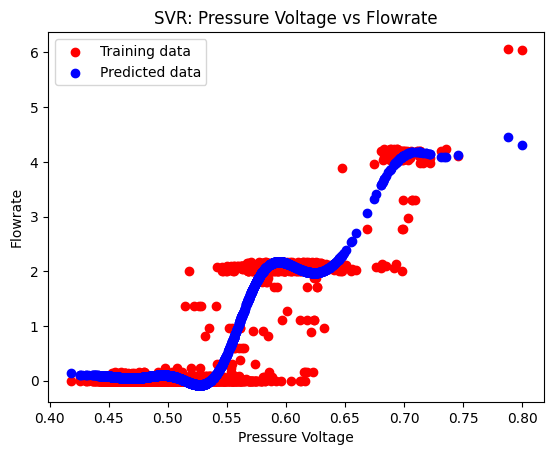

In [11]:
# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


## PH0303

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9498529076173714
RMSE:  0.5031209610145982


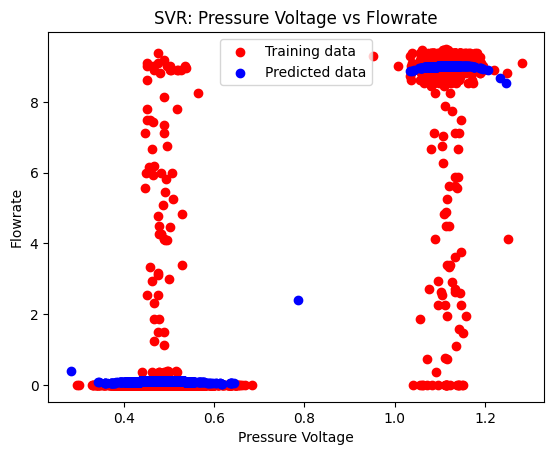

In [48]:
# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### smoothed

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.4838937063488674
RMSE:  1.614057902019728


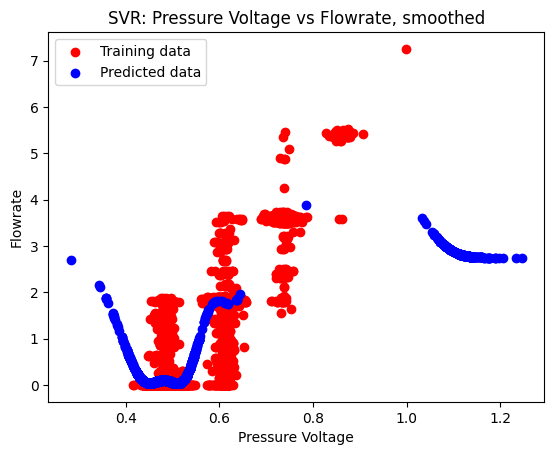

In [49]:
# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, smoothed')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9650320427559456
RMSE:  0.45053170698060907


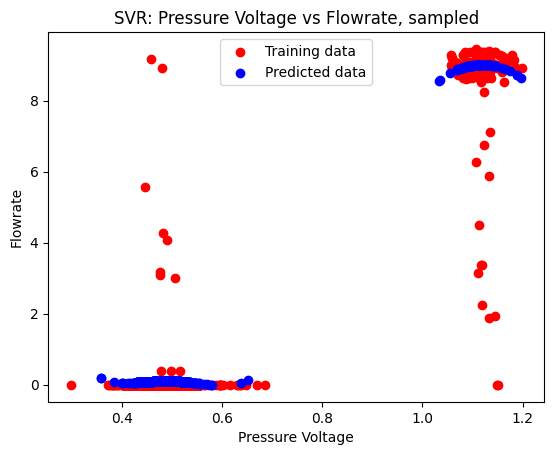

In [50]:
# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, sampled')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


### smoothed and sampled

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.4635454868547748
RMSE:  1.7646422823207235


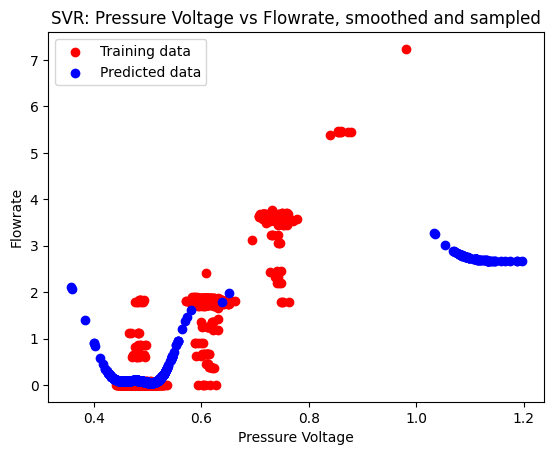

In [57]:
# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure Voltage vs Flowrate, smoothed and sampled')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


# CNN

## PH0100

Epoch 1/100
658/658 [==============================] - 3s 4ms/step - loss: 0.5948 - mean_absolute_error: 0.5948 - mean_squared_error: 1.8545 - val_loss: 0.4289 - val_mean_absolute_error: 0.4289 - val_mean_squared_error: 0.8252
Epoch 2/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_squared_error: 0.8861 - val_loss: 0.4224 - val_mean_absolute_error: 0.4224 - val_mean_squared_error: 0.8631
Epoch 3/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_squared_error: 0.8722 - val_loss: 0.4192 - val_mean_absolute_error: 0.4192 - val_mean_squared_error: 0.8080
Epoch 4/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4231 - mean_absolute_error: 0.4231 - mean_squared_error: 0.8782 - val_loss: 0.4173 - val_mean_absolute_error: 0.4173 - val_mean_squared_error: 0.7730
Epoch 5/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4201 - mean_abs

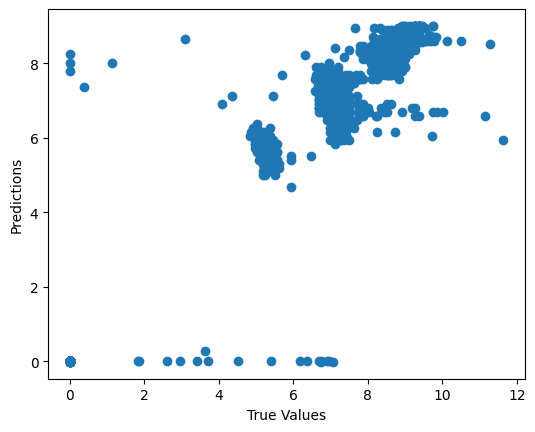

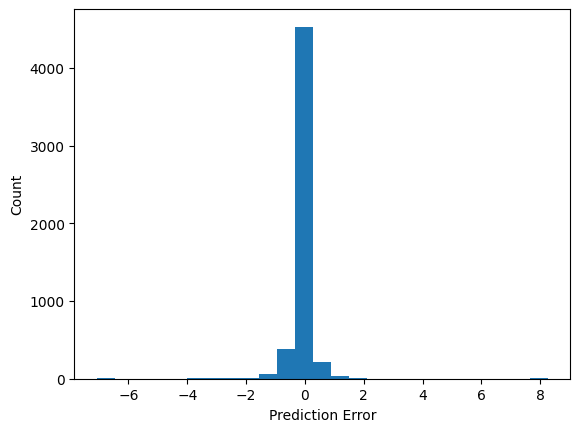

In [12]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Original')
print('Input - Pressure')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
658/658 [==============================] - 3s 4ms/step - loss: 0.5172 - mean_absolute_error: 0.5172 - mean_squared_error: 0.7463 - val_loss: 0.5234 - val_mean_absolute_error: 0.5234 - val_mean_squared_error: 0.8469
Epoch 2/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_squared_error: 0.1777 - val_loss: 0.5197 - val_mean_absolute_error: 0.5197 - val_mean_squared_error: 0.8555
Epoch 3/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_squared_error: 0.1769 - val_loss: 0.5070 - val_mean_absolute_error: 0.5070 - val_mean_squared_error: 0.8047
Epoch 4/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_squared_error: 0.1767 - val_loss: 0.4981 - val_mean_absolute_error: 0.4981 - val_mean_squared_error: 0.8268
Epoch 5/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3026 - mean_abs

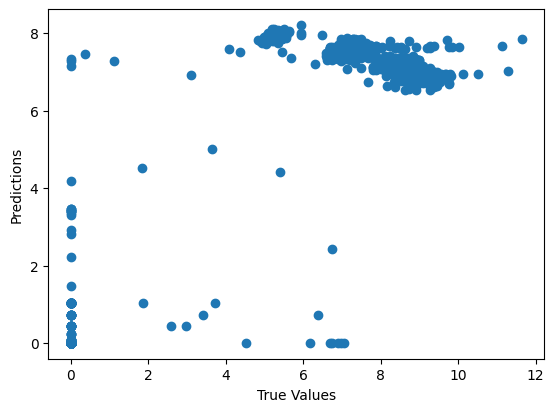

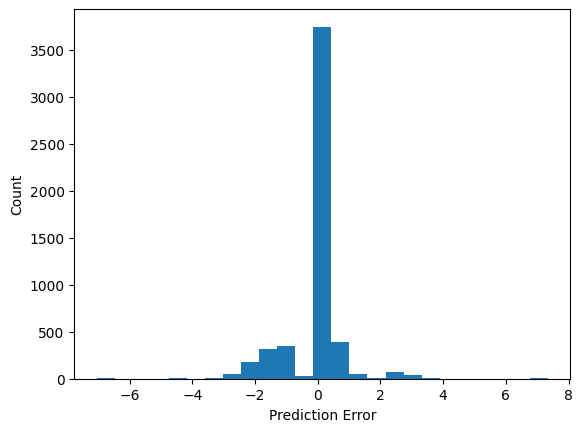

In [13]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Smoothened')
print('Input - Pressure')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 1.0824 - mean_absolute_error: 1.0824 - mean_squared_error: 5.0870 - val_loss: 0.5276 - val_mean_absolute_error: 0.5276 - val_mean_squared_error: 0.9242
Epoch 2/100
132/132 [==============================] - 0s 4ms/step - loss: 0.4972 - mean_absolute_error: 0.4972 - mean_squared_error: 0.8141 - val_loss: 0.5215 - val_mean_absolute_error: 0.5215 - val_mean_squared_error: 0.9512
Epoch 3/100
132/132 [==============================] - 0s 4ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_squared_error: 0.8235 - val_loss: 0.5035 - val_mean_absolute_error: 0.5035 - val_mean_squared_error: 0.9120
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.4764 - mean_absolute_error: 0.4764 - mean_squared_error: 0.8002 - val_loss: 0.5008 - val_mean_absolute_error: 0.5008 - val_mean_squared_error: 0.9372
Epoch 5/100
132/132 [==============================] - 0s 4ms/step - loss: 0.4516 - mean_abs

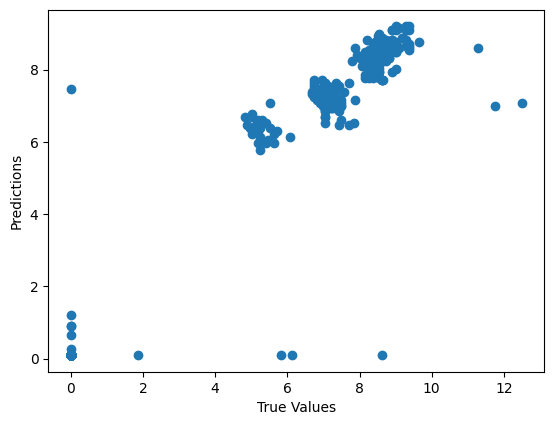

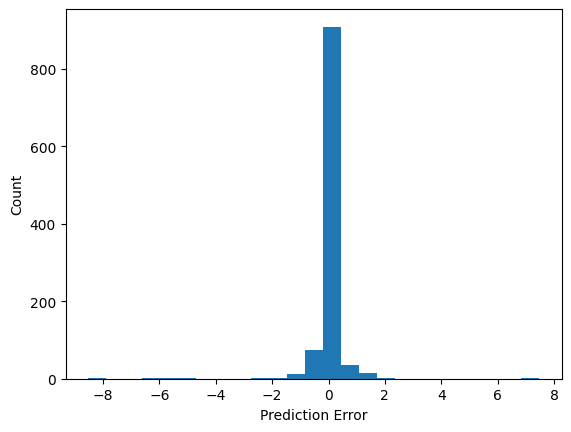

In [14]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled')
print('Input - Pressure')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 0.8652 - mean_absolute_error: 0.8652 - mean_squared_error: 1.3949 - val_loss: 1.0993 - val_mean_absolute_error: 1.0993 - val_mean_squared_error: 1.8277
Epoch 2/100
132/132 [==============================] - 0s 4ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_squared_error: 0.2108 - val_loss: 0.5435 - val_mean_absolute_error: 0.5435 - val_mean_squared_error: 0.9341
Epoch 3/100
132/132 [==============================] - 0s 4ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_squared_error: 0.1668 - val_loss: 0.5337 - val_mean_absolute_error: 0.5337 - val_mean_squared_error: 0.9459
Epoch 4/100
132/132 [==============================] - 0s 4ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_squared_error: 0.1660 - val_loss: 0.5333 - val_mean_absolute_error: 0.5333 - val_mean_squared_error: 0.9291
Epoch 5/100
132/132 [==============================] - 0s 4ms/step - loss: 0.2965 - mean_abs

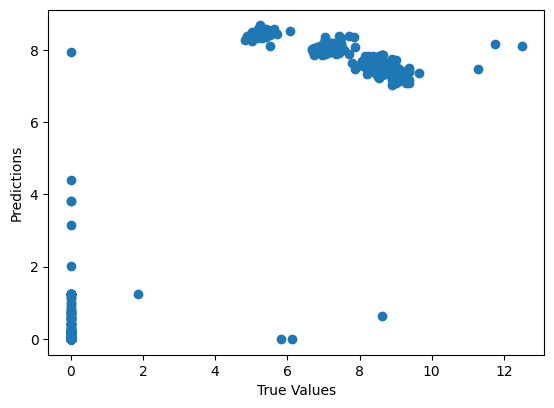

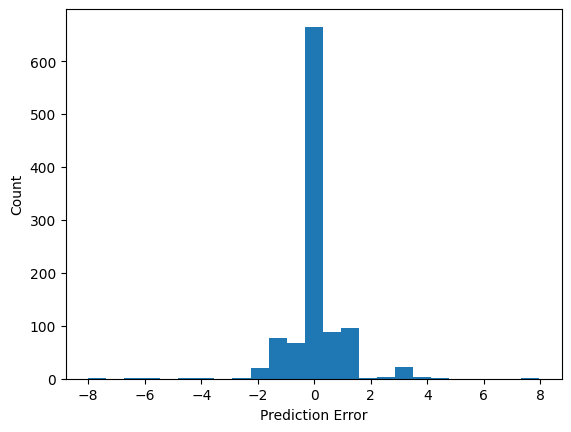

In [15]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled and Smoothened')
print('Input - Pressure')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
658/658 [==============================] - 3s 3ms/step - loss: 1.3417 - mean_absolute_error: 1.3417 - mean_squared_error: 8.0563 - val_loss: 0.5166 - val_mean_absolute_error: 0.5166 - val_mean_squared_error: 0.9461
Epoch 2/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4881 - mean_absolute_error: 0.4881 - mean_squared_error: 0.9587 - val_loss: 0.4488 - val_mean_absolute_error: 0.4488 - val_mean_squared_error: 0.9085
Epoch 3/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4481 - mean_absolute_error: 0.4481 - mean_squared_error: 0.9460 - val_loss: 0.4387 - val_mean_absolute_error: 0.4387 - val_mean_squared_error: 0.9223
Epoch 4/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4346 - mean_absolute_error: 0.4346 - mean_squared_error: 0.9234 - val_loss: 0.4338 - val_mean_absolute_error: 0.4338 - val_mean_squared_error: 0.8816
Epoch 5/100
658/658 [==============================] - 2s 3ms/step - loss: 0.4276 - mean_abs

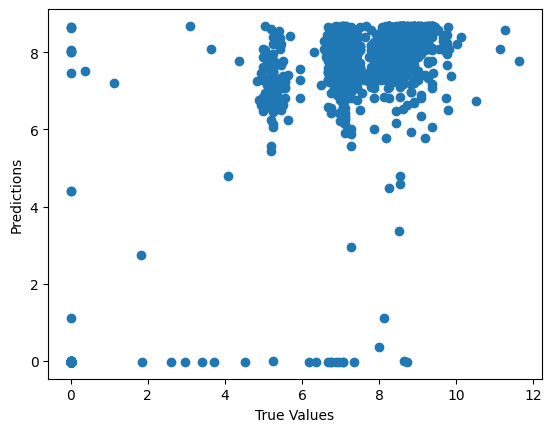

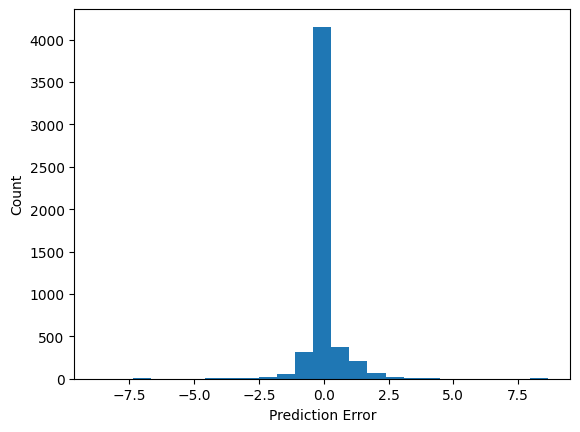

In [16]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Original')
print('Input - Pressure voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 2.4513 - mean_absolute_error: 2.4513 - mean_squared_error: 19.1545 - val_loss: 2.4769 - val_mean_absolute_error: 2.4769 - val_mean_squared_error: 19.2681
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 2.3548 - mean_absolute_error: 2.3548 - mean_squared_error: 17.7899 - val_loss: 2.2620 - val_mean_absolute_error: 2.2620 - val_mean_squared_error: 15.9086
Epoch 3/100
132/132 [==============================] - 1s 4ms/step - loss: 1.5892 - mean_absolute_error: 1.5892 - mean_squared_error: 8.4802 - val_loss: 0.5838 - val_mean_absolute_error: 0.5838 - val_mean_squared_error: 1.1783
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_squared_error: 0.9292 - val_loss: 0.5282 - val_mean_absolute_error: 0.5282 - val_mean_squared_error: 1.0960
Epoch 5/100
132/132 [==============================] - 0s 4ms/step - loss: 0.4791 - mean

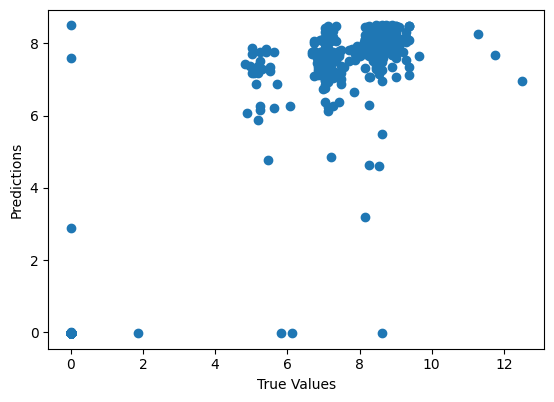

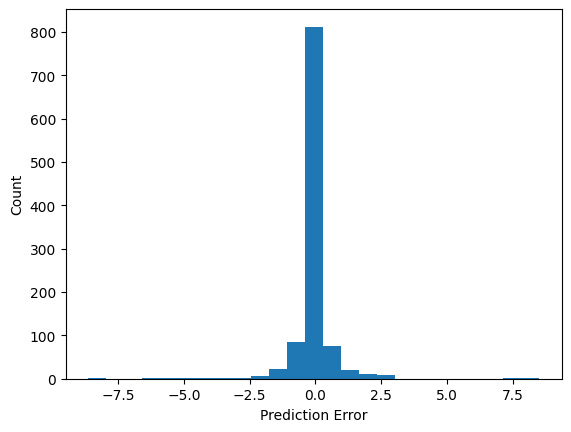

In [17]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled')
print('Input - Pressure voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
658/658 [==============================] - 3s 3ms/step - loss: 1.1231 - mean_absolute_error: 1.1231 - mean_squared_error: 1.9861 - val_loss: 1.4363 - val_mean_absolute_error: 1.4363 - val_mean_squared_error: 2.8062
Epoch 2/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_squared_error: 0.2628 - val_loss: 0.5850 - val_mean_absolute_error: 0.5850 - val_mean_squared_error: 1.0587
Epoch 3/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_squared_error: 0.2411 - val_loss: 0.6069 - val_mean_absolute_error: 0.6069 - val_mean_squared_error: 1.0671
Epoch 4/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_squared_error: 0.2436 - val_loss: 0.5873 - val_mean_absolute_error: 0.5873 - val_mean_squared_error: 1.0587
Epoch 5/100
658/658 [==============================] - 2s 3ms/step - loss: 0.3618 - mean_abs

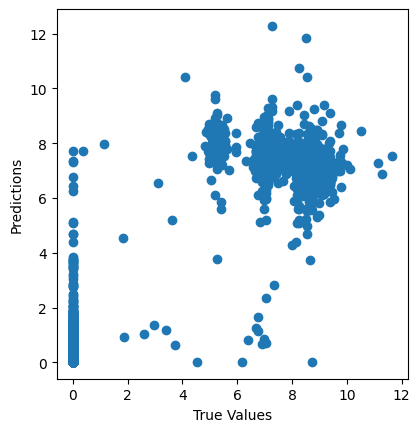

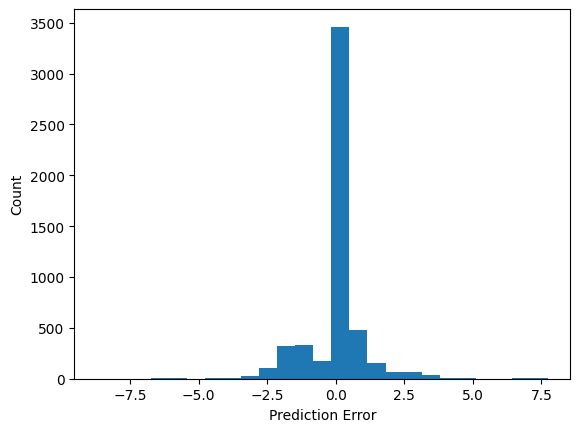

In [18]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Smoothened')
print('Input - Pressure voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 1s 5ms/step - loss: 1.5318 - mean_absolute_error: 1.5318 - mean_squared_error: 3.7570 - val_loss: 2.9892 - val_mean_absolute_error: 2.9892 - val_mean_squared_error: 11.0124
Epoch 2/100
132/132 [==============================] - 0s 4ms/step - loss: 1.2207 - mean_absolute_error: 1.2207 - mean_squared_error: 2.1736 - val_loss: 2.9602 - val_mean_absolute_error: 2.9602 - val_mean_squared_error: 10.1667
Epoch 3/100
132/132 [==============================] - 0s 4ms/step - loss: 1.1682 - mean_absolute_error: 1.1682 - mean_squared_error: 1.9871 - val_loss: 2.7903 - val_mean_absolute_error: 2.7903 - val_mean_squared_error: 8.9579
Epoch 4/100
132/132 [==============================] - 0s 4ms/step - loss: 1.0448 - mean_absolute_error: 1.0448 - mean_squared_error: 1.6262 - val_loss: 2.1893 - val_mean_absolute_error: 2.1893 - val_mean_squared_error: 6.2661
Epoch 5/100
132/132 [==============================] - 0s 4ms/step - loss: 0.6996 - mean_a

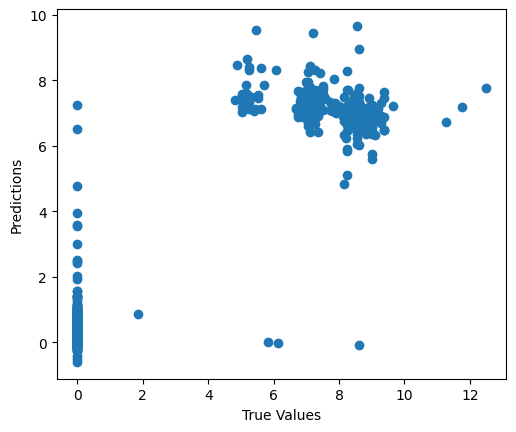

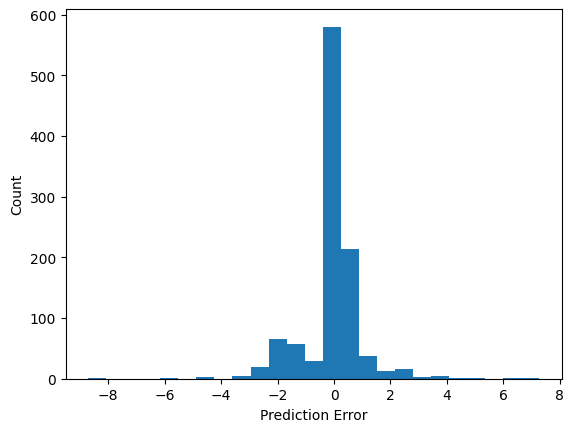

In [19]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled and smoothened')
print('Input - Pressure voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
658/658 [==============================] - 3s 4ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_squared_error: 0.4450 - val_loss: 0.0788 - val_mean_absolute_error: 0.0788 - val_mean_squared_error: 0.0235
Epoch 2/100
658/658 [==============================] - 2s 3ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_squared_error: 0.0210 - val_loss: 0.0746 - val_mean_absolute_error: 0.0746 - val_mean_squared_error: 0.0222
Epoch 3/100
658/658 [==============================] - 2s 3ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_squared_error: 0.0199 - val_loss: 0.0755 - val_mean_absolute_error: 0.0755 - val_mean_squared_error: 0.0215
Epoch 4/100
658/658 [==============================] - 2s 3ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_squared_error: 0.0191 - val_loss: 0.0722 - val_mean_absolute_error: 0.0722 - val_mean_squared_error: 0.0217
Epoch 5/100
658/658 [==============================] - 2s 3ms/step - loss: 0.0695 - mean_abs

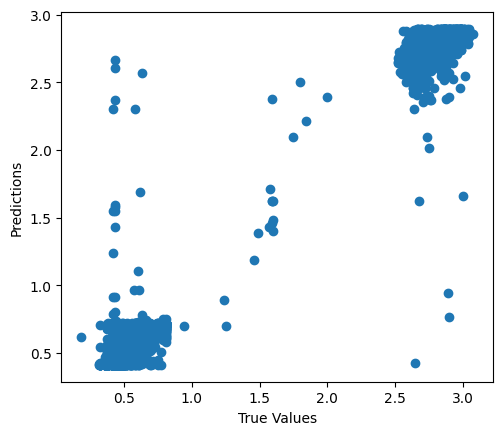

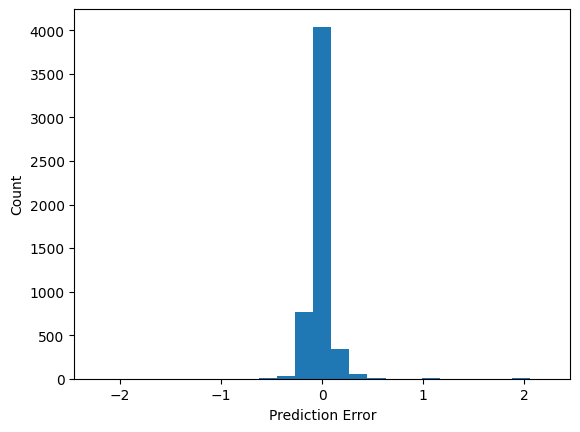

In [20]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
# df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Original')
print('Input - Pressure Voltage')
print('Predicted - Pressure')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 2s 7ms/step - loss: 0.6991 - mean_absolute_error: 0.6991 - mean_squared_error: 1.2358 - val_loss: 0.6314 - val_mean_absolute_error: 0.6314 - val_mean_squared_error: 0.9870
Epoch 2/100
132/132 [==============================] - 1s 5ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_squared_error: 0.4145 - val_loss: 0.0845 - val_mean_absolute_error: 0.0845 - val_mean_squared_error: 0.0230
Epoch 3/100
132/132 [==============================] - 1s 5ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_squared_error: 0.0251 - val_loss: 0.0834 - val_mean_absolute_error: 0.0834 - val_mean_squared_error: 0.0219
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_squared_error: 0.0250 - val_loss: 0.0810 - val_mean_absolute_error: 0.0810 - val_mean_squared_error: 0.0216
Epoch 5/100
132/132 [==============================] - 1s 4ms/step - loss: 0.0823 - mean_abs

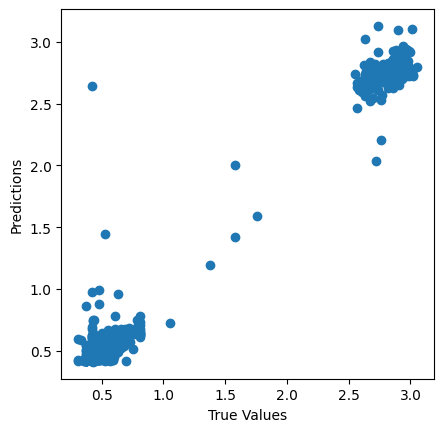

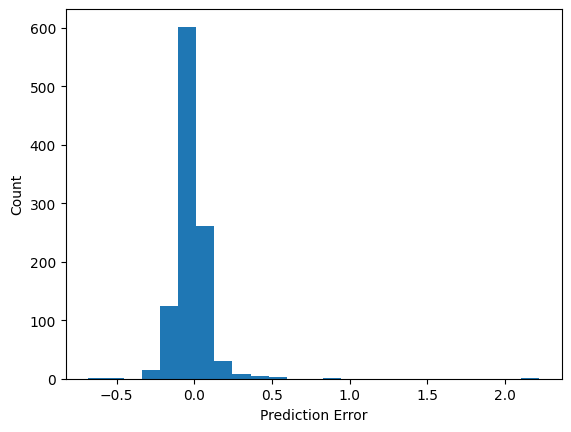

In [21]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled')
print('Input - Pressure Voltage')
print('Predicted - Pressure')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
658/658 [==============================] - 4s 4ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_squared_error: 0.1083 - val_loss: 0.0958 - val_mean_absolute_error: 0.0958 - val_mean_squared_error: 0.0278
Epoch 2/100
658/658 [==============================] - 3s 4ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_squared_error: 0.0063 - val_loss: 0.1011 - val_mean_absolute_error: 0.1011 - val_mean_squared_error: 0.0288
Epoch 3/100
658/658 [==============================] - 3s 4ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_squared_error: 0.0064 - val_loss: 0.0936 - val_mean_absolute_error: 0.0936 - val_mean_squared_error: 0.0275
Epoch 4/100
658/658 [==============================] - 3s 4ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_squared_error: 0.0063 - val_loss: 0.0931 - val_mean_absolute_error: 0.0931 - val_mean_squared_error: 0.0274
Epoch 5/100
658/658 [==============================] - 3s 4ms/step - loss: 0.0545 - mean_abs

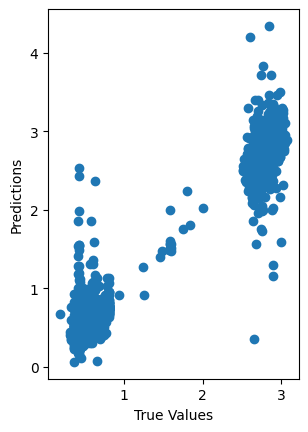

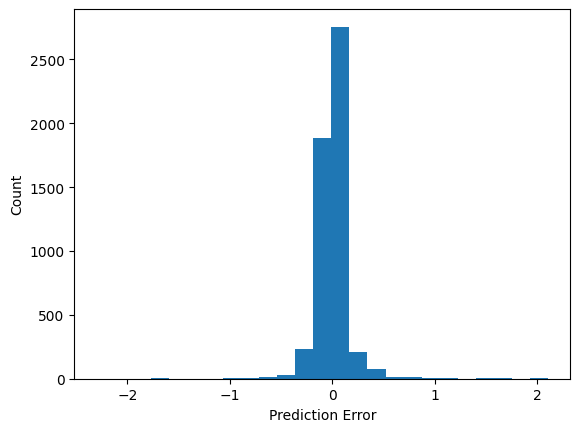

In [22]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
# df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Smoothened')
print('Input - Pressure Voltage')
print('Predicted - Pressure')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 1s 4ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_squared_error: 0.2526 - val_loss: 0.8007 - val_mean_absolute_error: 0.8007 - val_mean_squared_error: 0.7071
Epoch 2/100
132/132 [==============================] - 0s 3ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_squared_error: 0.1320 - val_loss: 0.7079 - val_mean_absolute_error: 0.7079 - val_mean_squared_error: 0.5419
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_squared_error: 0.0819 - val_loss: 0.4222 - val_mean_absolute_error: 0.4222 - val_mean_squared_error: 0.2096
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_squared_error: 0.0163 - val_loss: 0.0878 - val_mean_absolute_error: 0.0878 - val_mean_squared_error: 0.0236
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 0.0568 - mean_abs

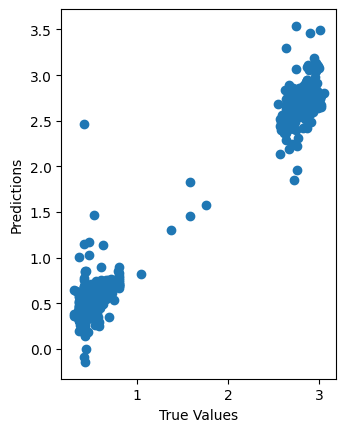

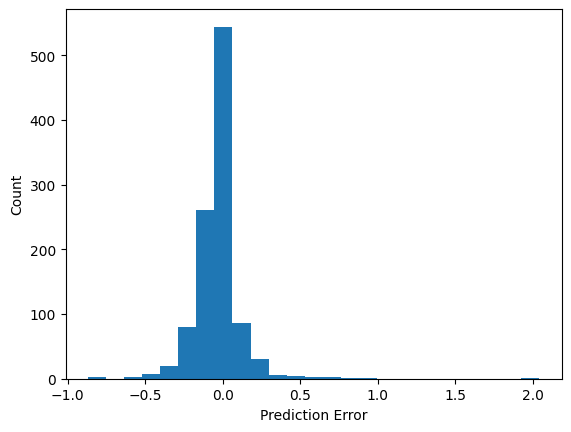

In [23]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled and Smoothened')
print('Input - Pressure Voltage')
print('Predicted - Pressure')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

## Ph0302

Epoch 1/100
666/666 [==============================] - 2s 2ms/step - loss: 0.4118 - mean_absolute_error: 0.4118 - mean_squared_error: 4.1603 - val_loss: 0.4307 - val_mean_absolute_error: 0.4307 - val_mean_squared_error: 4.3367
Epoch 2/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_squared_error: 4.1031 - val_loss: 0.4149 - val_mean_absolute_error: 0.4149 - val_mean_squared_error: 4.0276
Epoch 3/100
666/666 [==============================] - 1s 2ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_squared_error: 1.6585 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703 - val_mean_squared_error: 0.2169
Epoch 4/100
666/666 [==============================] - 1s 2ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_squared_error: 0.1701 - val_loss: 0.0698 - val_mean_absolute_error: 0.0698 - val_mean_squared_error: 0.2414
Epoch 5/100
666/666 [==============================] - 1s 2ms/step - loss: 0.0553 - mean_abs

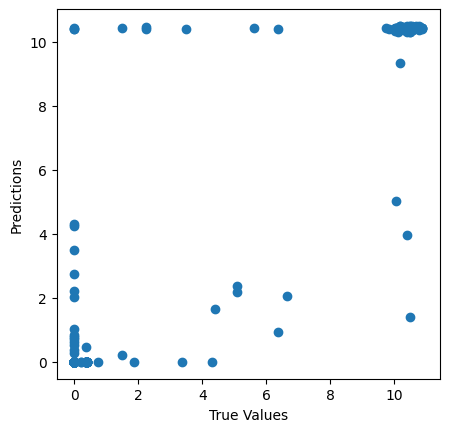

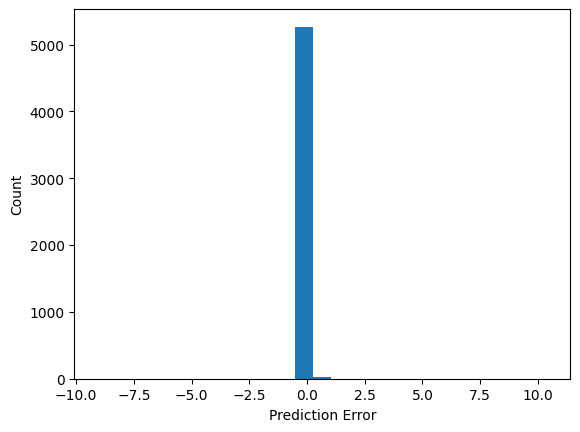

In [36]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Original')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
134/134 [==============================] - 1s 3ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_squared_error: 3.9720 - val_loss: 0.5055 - val_mean_absolute_error: 0.5055 - val_mean_squared_error: 5.1568
Epoch 2/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_squared_error: 3.9678 - val_loss: 0.5051 - val_mean_absolute_error: 0.5051 - val_mean_squared_error: 5.1556
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_squared_error: 3.9694 - val_loss: 0.5046 - val_mean_absolute_error: 0.5046 - val_mean_squared_error: 5.1554
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_squared_error: 3.9678 - val_loss: 0.5053 - val_mean_absolute_error: 0.5053 - val_mean_squared_error: 5.1507
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3933 - mean_abs

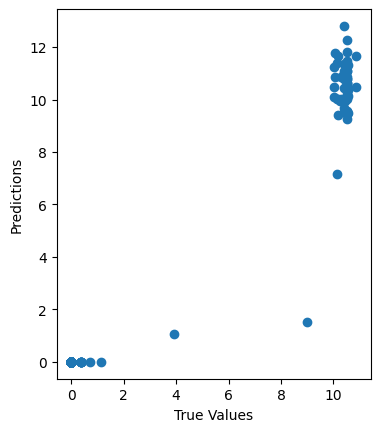

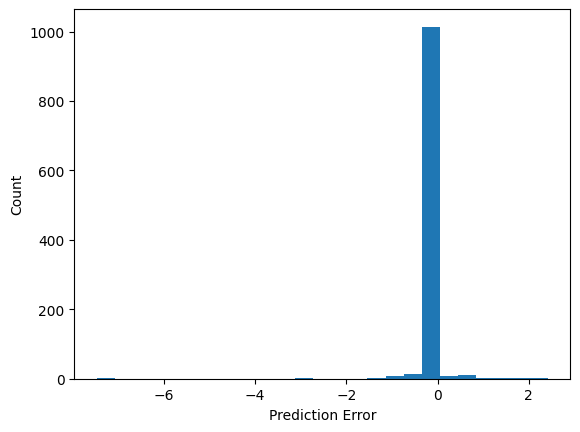

In [35]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
666/666 [==============================] - 3s 3ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_squared_error: 0.9418 - val_loss: 0.4305 - val_mean_absolute_error: 0.4305 - val_mean_squared_error: 4.0408
Epoch 2/100
666/666 [==============================] - 2s 3ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_squared_error: 0.5850 - val_loss: 0.3941 - val_mean_absolute_error: 0.3941 - val_mean_squared_error: 1.2413
Epoch 3/100
666/666 [==============================] - 2s 4ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_squared_error: 0.1162 - val_loss: 0.3173 - val_mean_absolute_error: 0.3173 - val_mean_squared_error: 0.9132
Epoch 4/100
666/666 [==============================] - 4s 6ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_squared_error: 0.1068 - val_loss: 0.3038 - val_mean_absolute_error: 0.3038 - val_mean_squared_error: 0.9592
Epoch 5/100
666/666 [==============================] - 4s 6ms/step - loss: 0.1275 - mean_abs

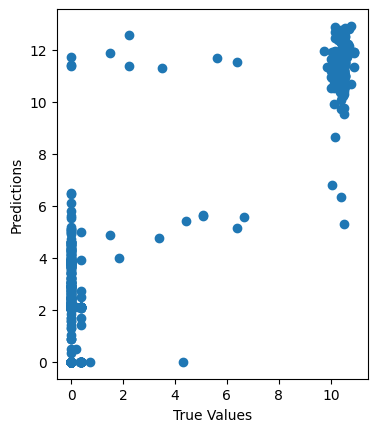

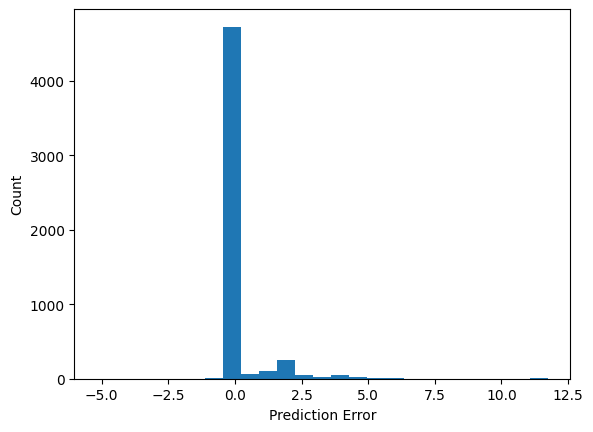

In [26]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Smoothened')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
134/134 [==============================] - 1s 4ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_squared_error: 0.9296 - val_loss: 0.5067 - val_mean_absolute_error: 0.5067 - val_mean_squared_error: 5.1285
Epoch 2/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_squared_error: 0.9232 - val_loss: 0.5053 - val_mean_absolute_error: 0.5053 - val_mean_squared_error: 5.0774
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3909 - mean_absolute_error: 0.3909 - mean_squared_error: 0.9132 - val_loss: 0.5054 - val_mean_absolute_error: 0.5054 - val_mean_squared_error: 5.0168
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_squared_error: 0.8998 - val_loss: 0.5044 - val_mean_absolute_error: 0.5044 - val_mean_squared_error: 4.9406
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 0.3872 - mean_abs

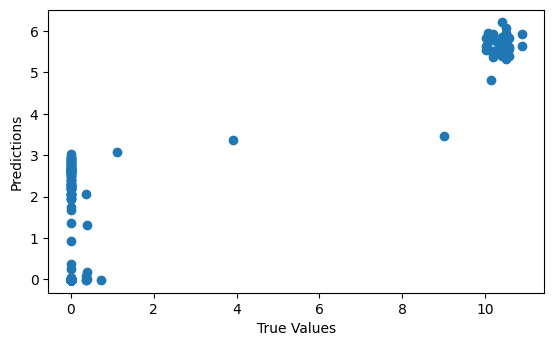

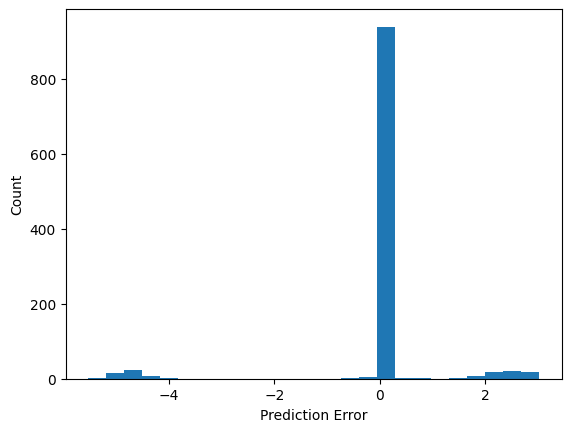

In [33]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled and Smoothened')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

## PH0303

Epoch 1/100
656/656 [==============================] - 3s 3ms/step - loss: 0.3799 - mean_absolute_error: 0.3799 - mean_squared_error: 0.6896 - val_loss: 0.1695 - val_mean_absolute_error: 0.1695 - val_mean_squared_error: 0.2925
Epoch 2/100
656/656 [==============================] - 2s 3ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_squared_error: 0.0678 - val_loss: 0.1498 - val_mean_absolute_error: 0.1498 - val_mean_squared_error: 0.2942
Epoch 3/100
656/656 [==============================] - 2s 3ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_squared_error: 0.0667 - val_loss: 0.1233 - val_mean_absolute_error: 0.1233 - val_mean_squared_error: 0.2920
Epoch 4/100
656/656 [==============================] - 2s 2ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_squared_error: 0.0663 - val_loss: 0.1053 - val_mean_absolute_error: 0.1053 - val_mean_squared_error: 0.2802
Epoch 5/100
656/656 [==============================] - 2s 2ms/step - loss: 0.0854 - mean_abs

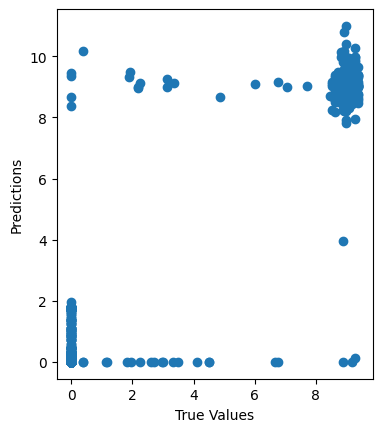

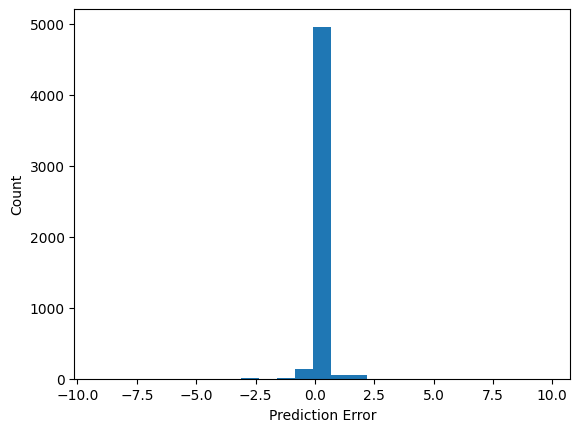

In [28]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Original')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 2s 5ms/step - loss: 0.5747 - mean_absolute_error: 0.5747 - mean_squared_error: 5.0605 - val_loss: 0.7051 - val_mean_absolute_error: 0.7051 - val_mean_squared_error: 6.2834
Epoch 2/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5673 - mean_absolute_error: 0.5673 - mean_squared_error: 5.0071 - val_loss: 0.7030 - val_mean_absolute_error: 0.7030 - val_mean_squared_error: 6.2304
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5656 - mean_absolute_error: 0.5656 - mean_squared_error: 4.9534 - val_loss: 0.6987 - val_mean_absolute_error: 0.6987 - val_mean_squared_error: 6.1317
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5587 - mean_absolute_error: 0.5587 - mean_squared_error: 4.7979 - val_loss: 0.6840 - val_mean_absolute_error: 0.6840 - val_mean_squared_error: 5.8239
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5363 - mean_abs

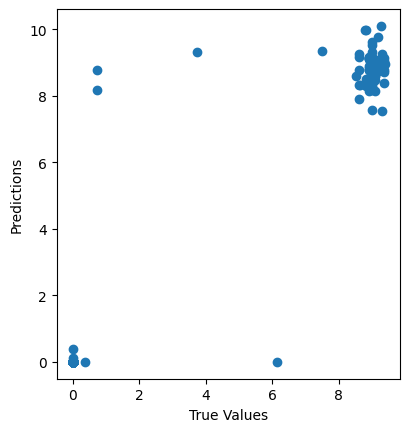

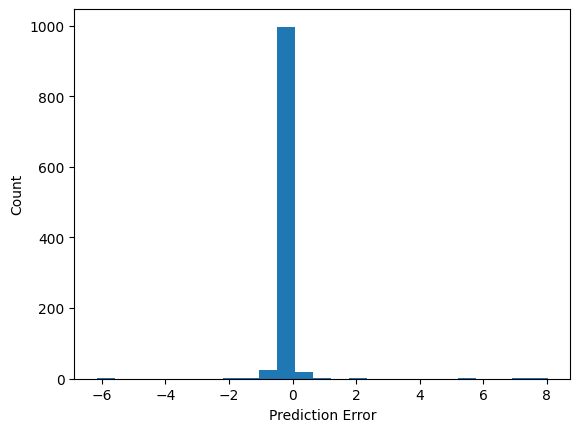

In [29]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
656/656 [==============================] - 3s 3ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_squared_error: 0.8739 - val_loss: 0.1669 - val_mean_absolute_error: 0.1669 - val_mean_squared_error: 0.2884
Epoch 2/100
656/656 [==============================] - 2s 3ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_squared_error: 0.0680 - val_loss: 0.1403 - val_mean_absolute_error: 0.1403 - val_mean_squared_error: 0.2853
Epoch 3/100
656/656 [==============================] - 2s 3ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_squared_error: 0.0668 - val_loss: 0.1026 - val_mean_absolute_error: 0.1026 - val_mean_squared_error: 0.2764
Epoch 4/100
656/656 [==============================] - 2s 2ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_squared_error: 0.0665 - val_loss: 0.1070 - val_mean_absolute_error: 0.1070 - val_mean_squared_error: 0.2769
Epoch 5/100
656/656 [==============================] - 2s 2ms/step - loss: 0.0859 - mean_abs

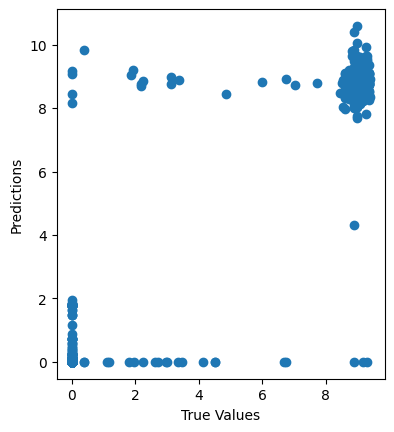

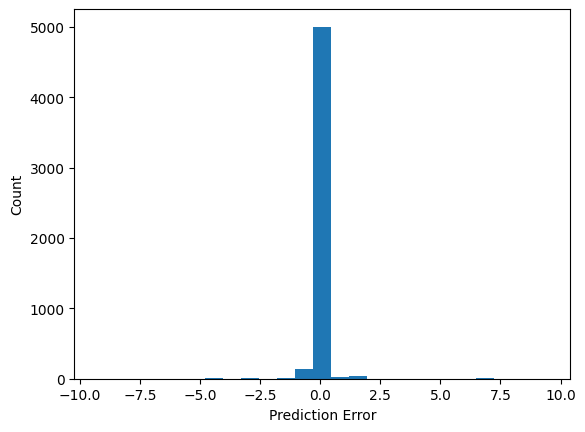

In [30]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Smoothened')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
132/132 [==============================] - 2s 6ms/step - loss: 0.5656 - mean_absolute_error: 0.5656 - mean_squared_error: 1.2696 - val_loss: 0.6999 - val_mean_absolute_error: 0.6999 - val_mean_squared_error: 6.1031
Epoch 2/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5534 - mean_absolute_error: 0.5534 - mean_squared_error: 1.2211 - val_loss: 0.6832 - val_mean_absolute_error: 0.6832 - val_mean_squared_error: 5.7287
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - mean_squared_error: 1.0598 - val_loss: 0.6267 - val_mean_absolute_error: 0.6267 - val_mean_squared_error: 4.4892
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_squared_error: 0.5641 - val_loss: 0.4070 - val_mean_absolute_error: 0.4070 - val_mean_squared_error: 1.2735
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 0.1414 - mean_abs

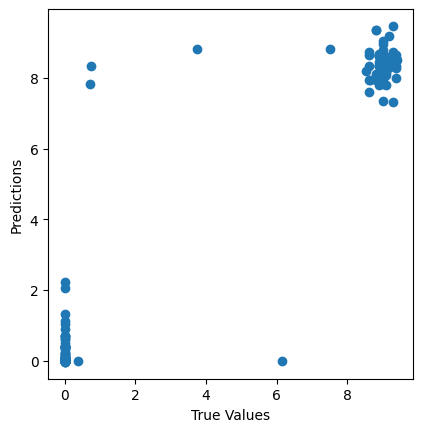

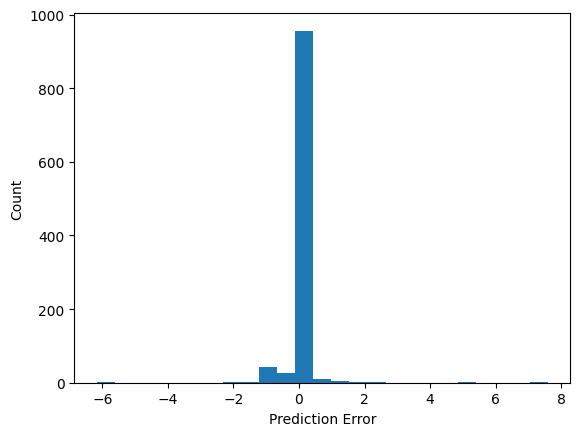

In [31]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
df_binary = df_binary.iloc[::5, :]

# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Sampled and Smoothened')
print('Input - Pressure Voltage')
print('Predicted - Flowrate')
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)